Necessary Libraries

In [1]:
import nltk
import string
import matplotlib.pyplot as plt
import re
import random
import numpy as np

from nltk import bigrams
from nltk.lm import Vocabulary
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize
from nltk.probability import FreqDist
from nltk.corpus import gutenberg
from nltk import ngrams
from nltk.lm.preprocessing import flatten
from nltk.lm.preprocessing import pad_both_ends
from nltk.lm import MLE, Laplace
from itertools import chain


Download Data Sets

In [2]:
nltk.download('punkt')
nltk.download('gutenberg')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

In [3]:
text  = gutenberg.raw("carroll-alice.txt")

Eliminating punctuations and numbers, and applying lowercase.

In [4]:
configuredText = re.sub(r'[^a-zA-Z\s]', '', text)
configuredText = configuredText.lower()

Tokenize the string into a list of words.

In [5]:
word_tokens = word_tokenize(configuredText)

In [6]:
print(word_tokens)

['alices', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'chapter', 'i', 'down', 'the', 'rabbithole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', 'and', 'of', 'having', 'nothing', 'to', 'do', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading', 'but', 'it', 'had', 'no', 'pictures', 'or', 'conversations', 'in', 'it', 'and', 'what', 'is', 'the', 'use', 'of', 'a', 'book', 'thought', 'alice', 'without', 'pictures', 'or', 'conversation', 'so', 'she', 'was', 'considering', 'in', 'her', 'own', 'mind', 'as', 'well', 'as', 'she', 'could', 'for', 'the', 'hot', 'day', 'made', 'her', 'feel', 'very', 'sleepy', 'and', 'stupid', 'whether', 'the', 'pleasure', 'of', 'making', 'a', 'daisychain', 'would', 'be', 'worth', 'the', 'trouble', 'of', 'getting', 'up', 'and', 'picking', 'the', 'daisies', 'when', 'suddenly', 'a', 'white', 'rabbit', 'with', 'pink', 'eyes', 'r

Tokenize the string into a list of characters.

In [7]:
print(list(configuredText))

['a', 'l', 'i', 'c', 'e', 's', ' ', 'a', 'd', 'v', 'e', 'n', 't', 'u', 'r', 'e', 's', ' ', 'i', 'n', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 'l', 'a', 'n', 'd', ' ', 'b', 'y', ' ', 'l', 'e', 'w', 'i', 's', ' ', 'c', 'a', 'r', 'r', 'o', 'l', 'l', ' ', '\n', '\n', 'c', 'h', 'a', 'p', 't', 'e', 'r', ' ', 'i', ' ', 'd', 'o', 'w', 'n', ' ', 't', 'h', 'e', ' ', 'r', 'a', 'b', 'b', 'i', 't', 'h', 'o', 'l', 'e', '\n', '\n', 'a', 'l', 'i', 'c', 'e', ' ', 'w', 'a', 's', ' ', 'b', 'e', 'g', 'i', 'n', 'n', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'g', 'e', 't', ' ', 'v', 'e', 'r', 'y', ' ', 't', 'i', 'r', 'e', 'd', ' ', 'o', 'f', ' ', 's', 'i', 't', 't', 'i', 'n', 'g', ' ', 'b', 'y', ' ', 'h', 'e', 'r', ' ', 's', 'i', 's', 't', 'e', 'r', ' ', 'o', 'n', ' ', 't', 'h', 'e', '\n', 'b', 'a', 'n', 'k', ' ', 'a', 'n', 'd', ' ', 'o', 'f', ' ', 'h', 'a', 'v', 'i', 'n', 'g', ' ', 'n', 'o', 't', 'h', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'd', 'o', ' ', 'o', 'n', 'c', 'e', ' ', 'o', 'r', ' ', 't', 'w', 'i', 'c', 'e', ' ',

Total token count

In [8]:
tokens = list(configuredText)
totalCount = len(tokens)
print(totalCount)
print(tokens)

136071
['a', 'l', 'i', 'c', 'e', 's', ' ', 'a', 'd', 'v', 'e', 'n', 't', 'u', 'r', 'e', 's', ' ', 'i', 'n', ' ', 'w', 'o', 'n', 'd', 'e', 'r', 'l', 'a', 'n', 'd', ' ', 'b', 'y', ' ', 'l', 'e', 'w', 'i', 's', ' ', 'c', 'a', 'r', 'r', 'o', 'l', 'l', ' ', '\n', '\n', 'c', 'h', 'a', 'p', 't', 'e', 'r', ' ', 'i', ' ', 'd', 'o', 'w', 'n', ' ', 't', 'h', 'e', ' ', 'r', 'a', 'b', 'b', 'i', 't', 'h', 'o', 'l', 'e', '\n', '\n', 'a', 'l', 'i', 'c', 'e', ' ', 'w', 'a', 's', ' ', 'b', 'e', 'g', 'i', 'n', 'n', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'g', 'e', 't', ' ', 'v', 'e', 'r', 'y', ' ', 't', 'i', 'r', 'e', 'd', ' ', 'o', 'f', ' ', 's', 'i', 't', 't', 'i', 'n', 'g', ' ', 'b', 'y', ' ', 'h', 'e', 'r', ' ', 's', 'i', 's', 't', 'e', 'r', ' ', 'o', 'n', ' ', 't', 'h', 'e', '\n', 'b', 'a', 'n', 'k', ' ', 'a', 'n', 'd', ' ', 'o', 'f', ' ', 'h', 'a', 'v', 'i', 'n', 'g', ' ', 'n', 'o', 't', 'h', 'i', 'n', 'g', ' ', 't', 'o', ' ', 'd', 'o', ' ', 'o', 'n', 'c', 'e', ' ', 'o', 'r', ' ', 't', 'w', 'i', 'c', 'e

Unique token count

In [9]:
char_list = list(set(configuredText))
uniqCount = len(char_list)
print(uniqCount)

28


In [10]:
print(char_list)

['m', 'a', ' ', 'v', 'h', '\n', 'k', 'c', 'j', 'f', 's', 'r', 'l', 'n', 'u', 'z', 't', 'i', 'w', 'o', 'd', 'q', 'b', 'y', 'p', 'x', 'e', 'g']


Visualize the token frequencies in a bar graph.

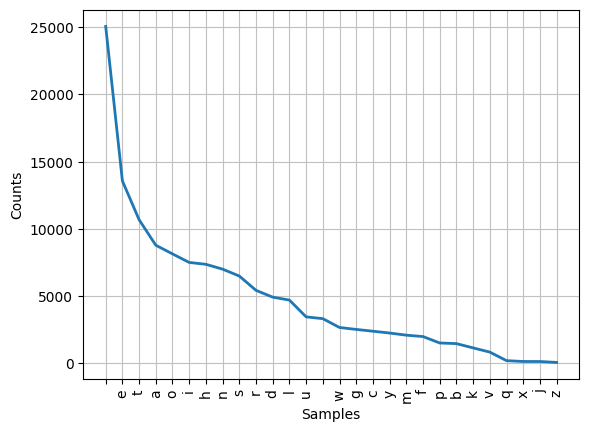

In [11]:
freq = FreqDist(tokens)
freq.plot()
plt.show()



Create the id2char and char2id dictionaries, which is needed for converting a word into a list of ids


In [12]:
id2char = {i: c for i, c in enumerate(char_list)}
char2id = {c: i for i, c in enumerate(char_list)}

Create the id list for all characters in the text

In [13]:
char_id_list = [char2id[char] for char in char_list]



Convert each word in the text to a list of character IDs


In [14]:
word_id_lists = [[char2id[char] for char in word] for word in word_tokens]

Revert the text using the character id list

In [15]:
reverted_text = "".join(id2char[id] for id in char_id_list)

Testing the mapping

In [16]:
word = "alice"
word_ids = [char2id[char] for char in word]
reverted_word = "".join(id2char[id] for id in word_ids)

print("Word:", word)
print("ID list:", word_ids)
print("Reverted word:", reverted_word)

Word: alice
ID list: [1, 12, 17, 7, 26]
Reverted word: alice


In [17]:
word = "natural"
word_ids = [char2id[char] for char in word]
reverted_word = "".join(id2char[id] for id in word_ids)

print("Word:", word)
print("ID list:", word_ids)
print("Reverted word:", reverted_word)

Word: natural
ID list: [13, 1, 16, 14, 11, 1, 12]
Reverted word: natural




Print the word and the id list.


In [18]:
for word in word_tokens:
    word_ids = [char2id[char] for char in word]
    print("Word:", word)
    print("ID list:", word_ids)

Streaming output truncated to the last 5000 lines.
Word: stand
ID list: [10, 16, 1, 13, 20]
Word: down
ID list: [20, 19, 18, 13]
Word: continued
ID list: [7, 19, 13, 16, 17, 13, 14, 26, 20]
Word: the
ID list: [16, 4, 26]
Word: king
ID list: [6, 17, 13, 27]
Word: i
ID list: [17]
Word: cant
ID list: [7, 1, 13, 16]
Word: go
ID list: [27, 19]
Word: no
ID list: [13, 19]
Word: lower
ID list: [12, 19, 18, 26, 11]
Word: said
ID list: [10, 1, 17, 20]
Word: the
ID list: [16, 4, 26]
Word: hatter
ID list: [4, 1, 16, 16, 26, 11]
Word: im
ID list: [17, 0]
Word: on
ID list: [19, 13]
Word: the
ID list: [16, 4, 26]
Word: floor
ID list: [9, 12, 19, 19, 11]
Word: as
ID list: [1, 10]
Word: it
ID list: [17, 16]
Word: is
ID list: [17, 10]
Word: then
ID list: [16, 4, 26, 13]
Word: you
ID list: [23, 19, 14]
Word: may
ID list: [0, 1, 23]
Word: sit
ID list: [10, 17, 16]
Word: down
ID list: [20, 19, 18, 13]
Word: the
ID list: [16, 4, 26]
Word: king
ID list: [6, 17, 13, 27]
Word: replied
ID list: [11, 26, 24, 12,



Create the bigram matrix


In [19]:
bigram_ex = bigrams(configuredText)
bigram_list = list(bigrams(configuredText))
bigram_freq = Counter(bigram_list)
print('Bigram Matrix:')
for bigram, freq in bigram_freq.items():
    print(bigram, freq)

Bigram Matrix:
('a', 'l') 929
('l', 'i') 855
('i', 'c') 598
('c', 'e') 705
('e', 's') 627
('s', ' ') 1991
(' ', 'a') 3077
('a', 'd') 442
('d', 'v') 18
('v', 'e') 698
('e', 'n') 936
('n', 't') 675
('t', 'u') 192
('u', 'r') 522
('r', 'e') 1150
(' ', 'i') 1759
('i', 'n') 2026
('n', ' ') 1600
(' ', 'w') 1692
('w', 'o') 271
('o', 'n') 1055
('n', 'd') 1269
('d', 'e') 443
('e', 'r') 1822
('r', 'l') 47
('l', 'a') 308
('a', 'n') 1607
('d', ' ') 2920
(' ', 'b') 893
('b', 'y') 76
('y', ' ') 1250
(' ', 'l') 686
('l', 'e') 731
('e', 'w') 52
('w', 'i') 367
('i', 's') 578
(' ', 'c') 809
('c', 'a') 311
('a', 'r') 705
('r', 'r') 87
('r', 'o') 347
('o', 'l') 166
('l', 'l') 681
('l', ' ') 614
(' ', '\n') 10
('\n', '\n') 852
('\n', 'c') 94
('c', 'h') 450
('h', 'a') 1148
('a', 'p') 118
('p', 't') 55
('t', 'e') 752
('r', ' ') 1338
('i', ' ') 396
(' ', 'd') 767
('d', 'o') 436
('o', 'w') 540
('w', 'n') 140
(' ', 't') 4030
('t', 'h') 3482
('h', 'e') 3778
('e', ' ') 5169
(' ', 'r') 448
('r', 'a') 269
('a', 'b')

Calculate the unigram probabilities

In [20]:
tokens = configuredText
unigram_freq = {}
N = len(tokens)
V = len(set(tokens))
for char in set(tokens):
    count = tokens.count(char)
    unigram_freq[char] = (count + 1) / (N + V)
    

In [21]:
print('Unigram Probabilities:')
for char, prob in unigram_freq.items():
    print(char, prob)

Unigram Probabilities:
m 0.015466682341530797
a 0.06460003379892579
  0.18410127921586492
v 0.0062234108994188055
h 0.05417379995444493

 0.024482178414242575
k 0.00851585977854356
c 0.0176268745545522
j 0.0010800961065107017
f 0.01470253271515588
s 0.047766699240993686
r 0.03995620834833467
l 0.03463655133395543
n 0.0515286666323779
u 0.02546675581745641
z 0.000580459812342486
t 0.07851637411002285
i 0.05518776772790395
w 0.01966215769403155
o 0.059853489004327735
d 0.036223631327195645
q 0.001542994437872431
b 0.010852394213036099
y 0.016634949558777066
p 0.011205078655978369
x 0.0010947912916332964
e 0.09971417864936553
g 0.01860410436520474


In [22]:
n = 2
ngrams_tokens = bigram_list
ngram_freq = Counter(bigram_list)
vocab1 = Vocabulary(tokens, unk_cutoff=1)
laplace = Laplace(order=n, vocabulary=vocab1)
laplace.fit([ngrams_tokens])


Print most frequent 5 bigrams and unigrams

In [23]:
print('Most frequent 5 bigrams:')
for bigram, freq in ngram_freq.most_common(5):
    print(bigram, freq)

print('Most frequent 5 unigrams:')
for char, freq in FreqDist(configuredText).most_common(5):
    print(char, freq)

Most frequent 5 bigrams:
('e', ' ') 5169
(' ', 't') 4030
('h', 'e') 3778
('t', 'h') 3482
(' ', 'a') 3077
Most frequent 5 unigrams:
  25055
e 13570
t 10685
a 8791
o 8145


Calculate the probability of the bigrams ”sh” and ”tk” considering them as the start
of the token.

In [24]:
sh_count = bigram_list.count(('s', 'h'))
tk_count = bigram_list.count(('t', 'k'))
total_freq = sum(bigram_freq.values())
sh_prob = sh_count / total_freq
print(sh_prob)
tk_prob = tk_count / total_freq
print(tk_prob)

0.006276181377232307
0.0


sh_count and tk_count are the counts of the bigrams (s, h) and (t, k) in bigram_list. total_freq is the total frequency of all bigrams in bigram_list. tk_prob is 0, it means that there were no occurrences of the bigram (t, k) in bigram_list, but there were 0.006276181377232307 occurrences of the bigram (s, h).

Create a new word that does not exist in English, using your bigram model. 

In [25]:
# Convert bigrams to strings
sorted_bigrams = [''.join(bg) for bg in bigram_freq.keys()]

# Generate a new word by randomly choosing bigrams
how_many_biagrams = 4  

new_word = ''.join(random.choices(sorted_bigrams, k=how_many_biagrams))

print("Generated new word:", new_word)

Generated new word: asrdrryb




Predict the rest of the words, given some characters.


In [26]:
# Define the context as the given characters
context = "ab"

# Get the probability of each possible word that can be formed by adding characters to the context
candidates = []
for word in word_tokens:
    if word.startswith(context):
        word_ids = [char2id[char] for char in word]
        log_prob = sum([unigram_freq[char] for char in word])  # Use unigram probabilities to calculate the probability of the word
        candidates.append((word, log_prob))

# Select the word with the highest probability as the predicted word
predicted_word = max(candidates, key=lambda x: x[1])[0]

print("Predicted word:", predicted_word)

Predicted word: absence
